In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic.shape

(891, 15)

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
t = titanic

t.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
t.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
corr = t[['age', 'fare', 'pclass', 'survived']].corr()
corr

,age,fare,pclass,survived
age,1.000000,0.096067,-0.369226,-0.077221
fare,0.096067,1.000000,-0.549500,0.257307
pclass,-0.369226,-0.549500,1.000000,-0.338481
survived,-0.077221,0.257307,-0.338481,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

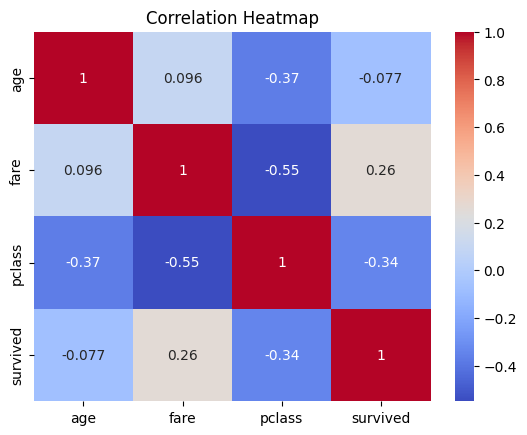

In [8]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0.5, 1.0, 'Passenger Class vs Survival')

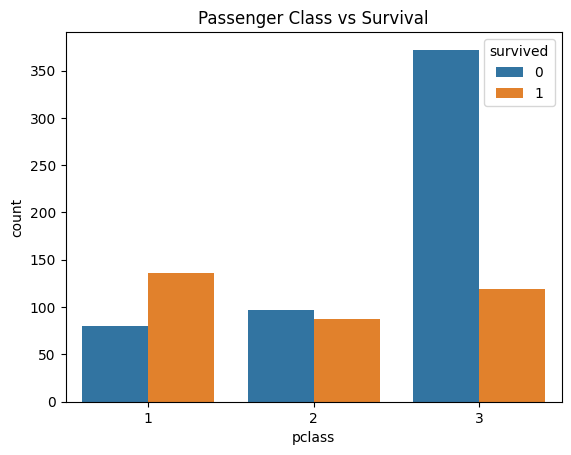

In [9]:
sns.countplot(data=t, x='pclass', hue='survived')
plt.title('Passenger Class vs Survival')

# Regression

In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

In [11]:
t1 = t
t1.shape

(891, 15)

In [12]:
t1['sex'] = t1['sex'].map({'male':0, 'female':1})
t1['embarked'] = t1['embarked'].map({'C':0, 'Q':1, 'S':2})

t1 = t1.fillna(t.median(numeric_only=True))

In [13]:
x = t1[['age', 'fare', 'pclass', 'sex', 'embarked', 'sibsp', 'parch']]
y_reg = t1['fare']
y_class = t1['survived']

In [14]:
X_train, X_test, y_reg_train, y_reg_test = train_test_split(x, y_reg, test_size=0.3, random_state=42)
X_train_class, X_test_class, y_class_train, y_class_test = train_test_split(x, y_class, test_size=0.1, random_state=42)

In [15]:
x_train_age = X_train['age'].values.reshape(-1, 1)
x_test_age = X_test['age'].values.reshape(-1, 1)

In [16]:
simple_reg = LinearRegression()
simple_reg.fit(x_train_age, y_reg_train)
y_reg_pred = simple_reg.predict(x_test_age)

In [17]:
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
f"slope: {simple_reg.coef_[0]:.2f}, intercept: {simple_reg.intercept_:.2f}, MSE: {mse:.2f}, R^2: {r2:.2f}"

'slope: 0.37, intercept: 21.08, MSE: 2135.43, R^2: 0.01'

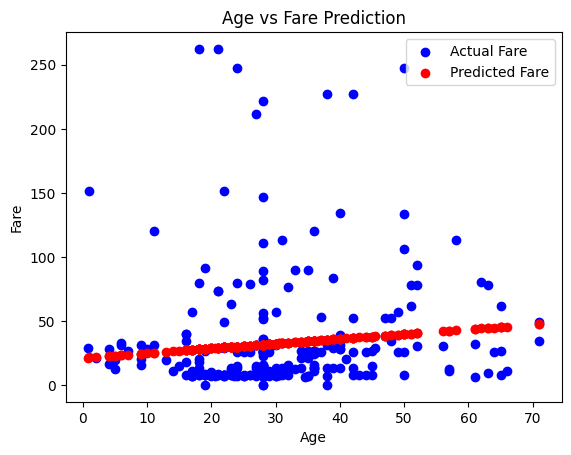

In [18]:
plt.scatter(x_test_age, y_reg_test, color='blue', label='Actual Fare')
plt.scatter(x_test_age, y_reg_pred, color='red', label='Predicted Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare Prediction')
plt.legend()
plt.show()

multiple regression

In [19]:
multi_reg = LinearRegression()
multi_reg.fit(X_train, y_reg_train)
y_reg_multi_pred = multi_reg.predict(X_test)

In [20]:
mse_multi = mean_squared_error(y_reg_test, y_reg_multi_pred)
r2 = r2_score(y_reg_test, y_reg_multi_pred)

print("Coefficient")
for f, coef in zip(x.columns, y_reg_multi_pred):
    if f == 'embarked':
        print(f"{f}:\t {coef:.5f}")
    else:
        print(f"{f}:\t\t {coef:.5f}")
print(f"intercept:\t {multi_reg.intercept_:.5f}")
print(f"MSE:\t\t {mse_multi:.5f}")
print(f"R sq:\t\t {r2:.5f}")

Coefficient
age:		 15.24580
fare:		 10.50000
pclass:		 7.92500
sex:		 33.00000
embarked:	 11.24170
sibsp:		 78.85000
parch:		 7.75000
intercept:	 0.00000
MSE:		 0.00000
R sq:		 1.00000


classification

In [21]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_class, y_class_train)

y_class_pred = log_reg.predict(X_test_class)

accuracy = accuracy_score(y_class_test, y_class_pred)
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
class_report = classification_report(y_class_test, y_class_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[46  8]
 [ 6 30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        54
           1       0.79      0.83      0.81        36

    accuracy                           0.84        90
   macro avg       0.84      0.84      0.84        90
weighted avg       0.85      0.84      0.85        90

